In [1]:
from astropy.table import Table
from astropy.io import fits
import astropy.units as U

import numpy as np
import matplotlib.pyplot as plt

In [4]:
#columns : rpmid | rpavg | pimid | piavg | corr(rp,pi) | std(rp,pi)
#            0       1       2       3         4             5
"""xirppi_15log11 = np.genfromtxt('/pscratch/sd/e/edown/outputs/outdir_xirunpc_maglim_18/rppi/xirppi_BGS_ANY_NScomb_0.1_0.5_default_log1_1_njack60_nran4_split20.txt')
xirppi_15log14 = np.genfromtxt('/pscratch/sd/e/edown/outputs/outdir_xirunpc_maglim_18/rppi/xirppi_BGS_ANY_NScomb_0.1_0.5_default_log1_4_njack60_nran4_split20.txt')
xirppi_15log15 = np.genfromtxt('/pscratch/sd/e/edown/outputs/outdir_xirunpc_maglim_18/rppi/xirppi_BGS_ANY_NScomb_0.1_0.5_default_log1_5_njack60_nran4_split20.txt')
xirppi_15log110 = np.genfromtxt('/pscratch/sd/e/edown/outputs/outdir_xirunpc_maglim_18/rppi/xirppi_BGS_ANY_NScomb_0.1_0.5_default_log1_10_njack60_nran4_split20.txt')

xirppi_15log21 = np.genfromtxt('/pscratch/sd/e/edown/outputs/outdir_xirunpc_maglim_18/rppi/xirppi_BGS_ANY_NScomb_0.1_0.5_default_log2_1_njack60_nran4_split20.txt')
xirppi_15log24 = np.genfromtxt('/pscratch/sd/e/edown/outputs/outdir_xirunpc_maglim_18/rppi/xirppi_BGS_ANY_NScomb_0.1_0.5_default_log2_4_njack60_nran4_split20.txt')
xirppi_15log25 = np.genfromtxt('/pscratch/sd/e/edown/outputs/outdir_xirunpc_maglim_18/rppi/xirppi_BGS_ANY_NScomb_0.1_0.5_default_log2_5_njack60_nran4_split20.txt')
xirppi_15log210 = np.genfromtxt('/pscratch/sd/e/edown/outputs/outdir_xirunpc_maglim_18/rppi/xirppi_BGS_ANY_NScomb_0.1_0.5_default_log2_10_njack60_nran4_split20.txt')

xirppi_15log41 = np.genfromtxt('/pscratch/sd/e/edown/outputs/outdir_xirunpc_maglim_18/rppi/xirppi_BGS_ANY_NScomb_0.1_0.5_default_log4_1_njack60_nran4_split20.txt')
xirppi_15log44 = np.genfromtxt('/pscratch/sd/e/edown/outputs/outdir_xirunpc_maglim_18/rppi/xirppi_BGS_ANY_NScomb_0.1_0.5_default_log4_4_njack60_nran4_split20.txt')
xirppi_15log45 = np.genfromtxt('/pscratch/sd/e/edown/outputs/outdir_xirunpc_maglim_18/rppi/xirppi_BGS_ANY_NScomb_0.1_0.5_default_log4_5_njack60_nran4_split20.txt')
xirppi_15log410 = np.genfromtxt('/pscratch/sd/e/edown/outputs/outdir_xirunpc_maglim_18/rppi/xirppi_BGS_ANY_NScomb_0.1_0.5_default_log4_10_njack60_nran4_split20.txt')


xirppi_13log11 = np.genfromtxt('/pscratch/sd/e/edown/outputs/outdir_xirunpc_maglim_18/rppi/xirppi_BGS_ANY_NScomb_0.1_0.3_default_log1_1_njack60_nran4_split20.txt')
xirppi_35log11 = np.genfromtxt('/pscratch/sd/e/edown/outputs/outdir_xirunpc_maglim_18/rppi/xirppi_BGS_ANY_NScomb_0.3_0.5_default_log1_1_njack60_nran4_split20.txt')"""

xirppi_15log21_N = np.genfromtxt('/pscratch/sd/e/edown/outputs/outdir_xirunpc_maglim_18/rppi/xirppi_BGS_ANY_N_0.1_0.5_default_log1_1_njack60_nran4_split20.txt')
xirppi_15log21_S = np.genfromtxt('/pscratch/sd/e/edown/outputs/outdir_xirunpc_maglim_18/rppi/xirppi_BGS_ANY_S_0.1_0.5_default_log1_1_njack60_nran4_split20.txt')

xirppi_13log21_N = np.genfromtxt('/pscratch/sd/e/edown/outputs/outdir_xirunpc_maglim_18/rppi/xirppi_BGS_ANY_N_0.1_0.3_default_log1_1_njack60_nran4_split20.txt')
xirppi_13log21_S = np.genfromtxt('/pscratch/sd/e/edown/outputs/outdir_xirunpc_maglim_18/rppi/xirppi_BGS_ANY_S_0.1_0.3_default_log1_1_njack60_nran4_split20.txt')

xirppi_35log21_N = np.genfromtxt('/pscratch/sd/e/edown/outputs/outdir_xirunpc_maglim_18/rppi/xirppi_BGS_ANY_N_0.3_0.5_default_log1_1_njack60_nran4_split20.txt')
xirppi_35log21_S = np.genfromtxt('/pscratch/sd/e/edown/outputs/outdir_xirunpc_maglim_18/rppi/xirppi_BGS_ANY_S_0.3_0.5_default_log1_1_njack60_nran4_split20.txt')

In [6]:
def plot_contours(data_N, data_S, name): #in a standard format  
    rp_bins_N = []
    for rp in data_N[:,0]:
        if not rp in rp_bins_N:
            rp_bins_N.append(rp)
    pi_bins_N = []
    for pi in data_N[:,2]:
        if not pi in pi_bins_N:
            pi_bins_N.append(pi)
            
    corr_reshape_N = np.transpose(np.reshape(data_N[:,4],(len(rp_bins_N), len(pi_bins_N))))
    print(np.shape(corr_reshape_N),np.shape(rp_bins_N),np.shape(pi_bins_N))
    rp_bins_S = []
    for rp in data_S[:,0]:
        if not rp in rp_bins_S:
            rp_bins_S.append(rp)
    pi_bins_S = []
    for pi in data_S[:,2]:
        if not pi in pi_bins_S:
            pi_bins_S.append(pi)
            
    corr_reshape_S = np.transpose(np.reshape(data_S[:,4],(len(rp_bins_S), len(pi_bins_S))))
    corr_log_bins = np.logspace(0, np.log10(20), num=20, base=10)
    
    
    plt.figure(figsize=(12,5), dpi=150)
    
    ax1 = plt.subplot(121)
    plt.title('N')
    ax1.contour(rp_bins_N,pi_bins_N,corr_reshape_N,levels=corr_log_bins, cmap='viridis')
    plt.ylim(0,17.5)
    plt.xlim(0.1,7)
    plt.xlabel('rp (Mpc/h)')
    plt.ylabel('pi (Mpc/h)')
    
    ax2 = plt.subplot(122)
    plt.title('S')
    ax2.contour(rp_bins_S,pi_bins_S,corr_reshape_S,levels=corr_log_bins, cmap='viridis')
    plt.ylim(0,17.5)
    plt.xlim(0.1,7)
    plt.xlabel('rp (Mpc/h)')
    
    plt.savefig(f'../figures/week5/{name}.png')
 

(80, 48) (48,) (80,)


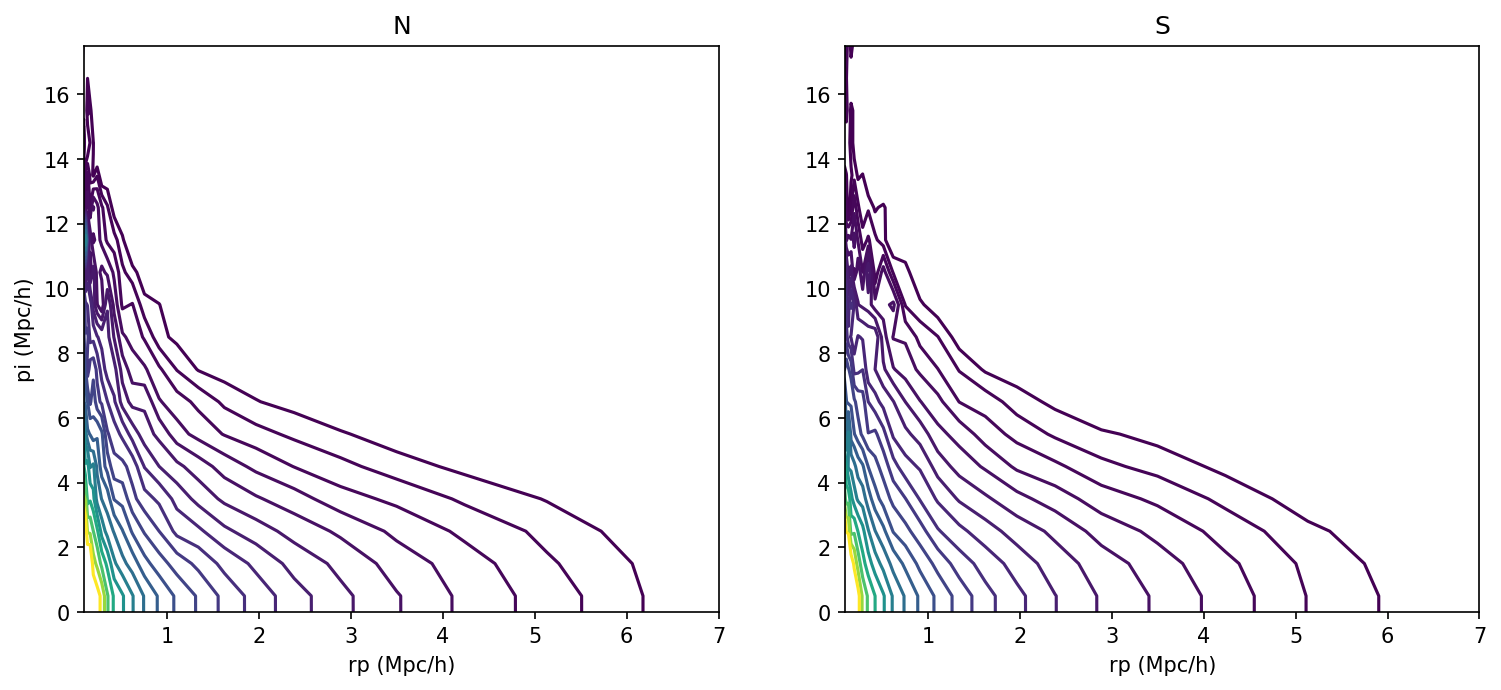

In [7]:
plot_contours(xirppi_15log21_N, xirppi_15log21_S, 'xirppi_15log21')

(80, 48) (48,) (80,)


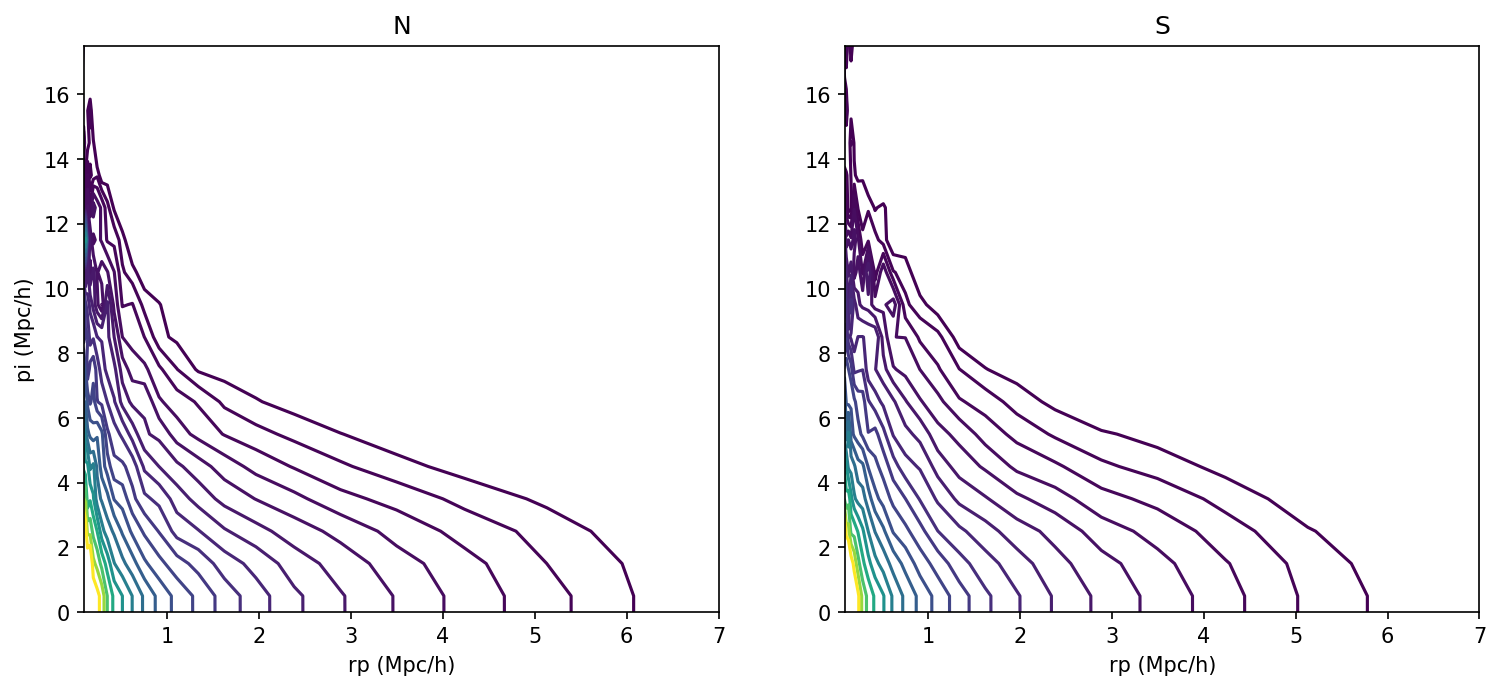

In [8]:
plot_contours(xirppi_13log21_N, xirppi_13log21_S, 'xirppi_13log21')

(80, 48) (48,) (80,)


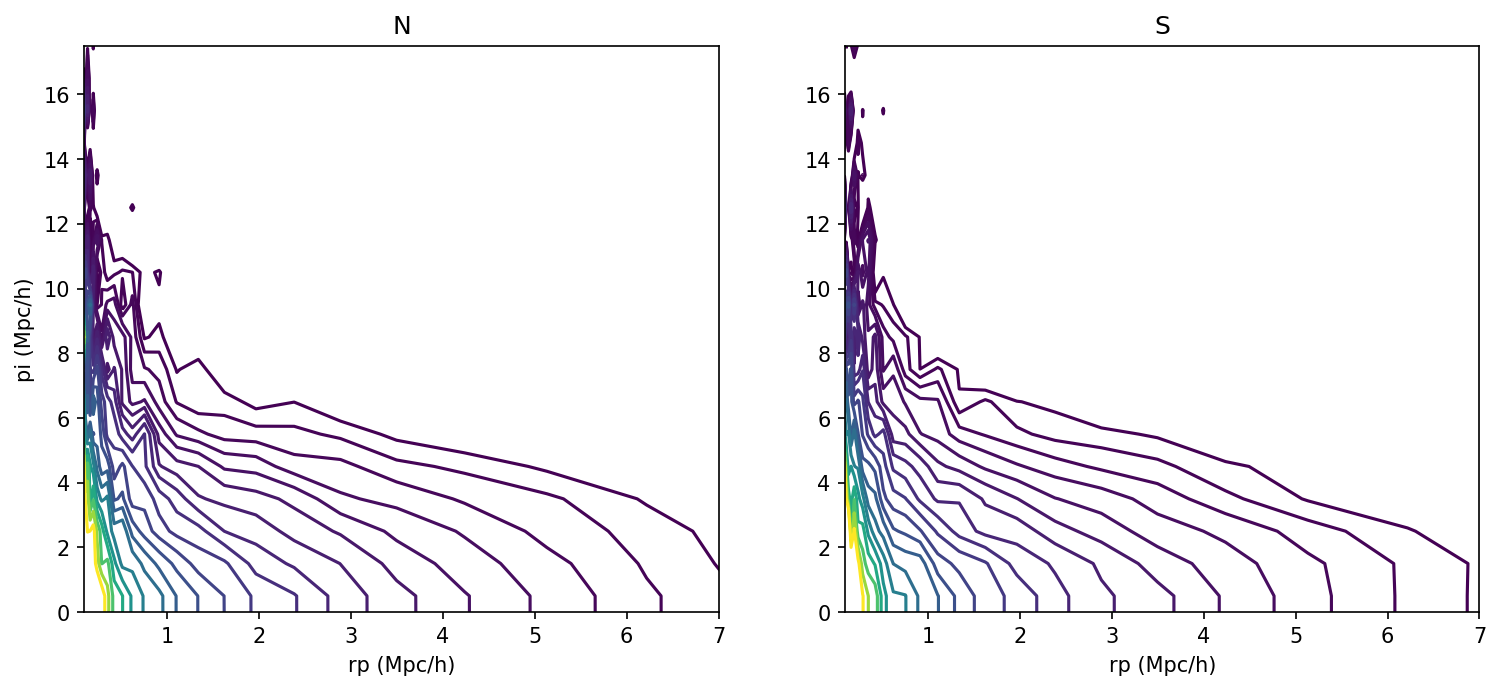

In [9]:
plot_contours(xirppi_35log21_N, xirppi_35log21_S, 'xirppi_35log21')